# Kaggle Titanic 따라하기

In [201]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [202]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [203]:
print(combine) # 타이타닉 훈련용 데이터와 테스트 데이터의 합본

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...

In [204]:
print(train_df.columns.values) # train의 칼럼명

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


6. 범주형과 수치형

ⓐ 범주형 데이터 : 몇 개의 범주로 나누어진 데이터

    - 명목형 : 성별, 혈액형 등 단순한 분류

    - 순서형 : 개개의 값들은 이산적이며 순서 관계가 존재하는 자료

ⓑ 수치형 데이터 : 이산형과 연속형으로 이루어진 데이터, 숫자로 표시

    - 이산형 : 이산적인 값을 갖는 데이터

    - 연속형 : 연속적인 값을 갖는 데이터

    

그렇다면 이 문제에서는

    범주형 : Survived, Sex, Embarkd / PClass

    수치형 : SibSp, Parch / Age, Fare



In [205]:
train_df.head() # 수치형/ 범주형 구분을 위해

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [207]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [208]:
train_df.describe() # 각 항목에 대하여 요약정보를 제공한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [209]:
train_df.describe(include=['O']) # 범주형 데이터 특징 살펴보기

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Greenberg, Mr. Samuel",male,347082,G6,S
freq,1,577,7,4,644


In [210]:
train_df.describe(include = "all")  # 수치형 데이터 특징 살펴보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Greenberg, Mr. Samuel",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## pivotin features로 분석하기

위의 관측과 예측들은 빠르고 간단하게 확인해볼 수 있습니다. 

지금은 Null이나 NaN 등 빈 값이 없는 특성값에 대해서만 할 수 있습니다. 

여기서는 Pclass, Sex, Sibsp and Parch 특성에 대해서 살펴봅니다.

 

Pclass : Pclass = 1 인 승객에 대해서 생존확률이 0.5보다 높은 것을 알 수 있습니다. 이는 모델에 특성으로 넣으면 됩니다.

Sex : 실제로 여성 승객이 생존 확률이 74%로 높은 수치임을 알 수 있습니다.

SibSp and Parch : 다음 두 특성은 상관관계를 찾기 어렵습니다. 이런 경우에는 특성을 합쳐 새로운 성질을 찾아내야 합니다.

In [211]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [212]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [213]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [214]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 데이터 시각화를 통한 분석
## 수치형 특성의 상관관계
이제 수치형 데이터들과 생존 여부간의 상관관계를 살펴보도록 하겠습니다.

히스토그램 차트는 연속형 수치형 변수를 분석하는 데 매우 유용합니다. 연속형 데이터를 사용자 지정 범위에 따라 차트로 나타내어, 분포를 통해 패턴 또는 유용한 정보를 추출할 수 있습니다.

### Observations

영아(Age <= 4)는 생존 확률이 매우 높다.
최고력령 승객은 살았다. (Age = 80)
15세에서 25세 사이의 사람들은 생존하지 못한 사람이 많다.
대부분의 승객은 15-35세이다.

### Decisions

이 간단한 분석으로 우리는 다음과 같은 가정을 할 수 있습니다.

Age 특성은 모델에 필요하다.
Age에서 Nul값을 채워야 한다.
나이를 범위에 따라 그룹화하여야 한다.(연속형 -> 범주형)

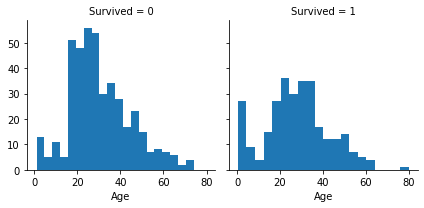

In [215]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## 수치형과 범주형 특성의 상관관계
1개의 그래프로도 여러 특성을 조합하여 상관관계를 확인해볼 수 있스빈다. 이는 수치형, 범주형 특성에서 수치를 가지고 잇는 데이터에서 가능하빈다.
### Observations
Pclass=3인 승객수가 가장 많습니다. 하지만 대다수가 생존하지 못했습니다.
Pclass=2, Pclass=3에서 영아 승객은 대부분 생존했습니다.
Pclass=1인 승객들은 대부분 생존했습니다.
Pclass에 따라 승객의 나이 분포는 다릅니다.
### Decisions
Pclass는 모델에 필요한 특성입니다

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


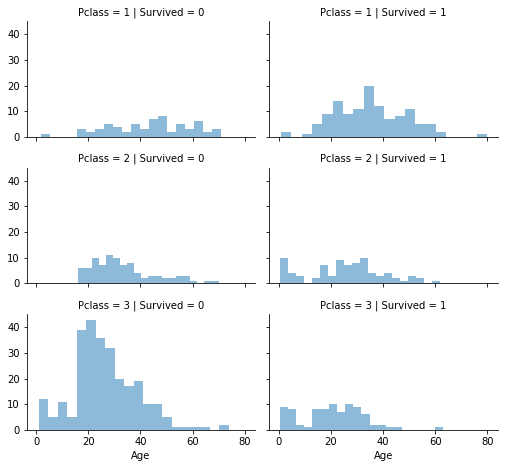

In [216]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## 범주형 특성의 상관관계
이제 범주형 특성을 살펴봅시다
### Observations
여성 승객은 높은 비율로 생존했다.
### Decisions
Sex 특성은 모델에 필요합니다.
Embarked 특성은 빈 부분을 채워야 하고, 모델에 잇어 필요한 특성입니다.

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


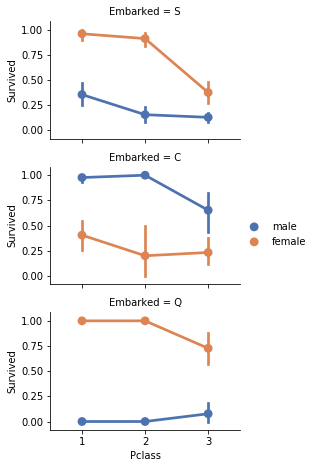

In [217]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep') # palette 색깔지정함수
grid.add_legend()

## 범주형 특성과 수치형 특성의 상관관계
이제 수치형 값이 아닌 범주형 특성과 수치형 특성의 상관관계를 확인하려고 합니다. Embarked, Sex, Fare과 Survived의 특성을 살펴볼 수 있습니다.

### Observations
높은 요금을 낸 승객은 생존율이 더 높았다.
생존율과 Embarked의 상관관계

### Dexisions
Fare 특성의 분류를 고려

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


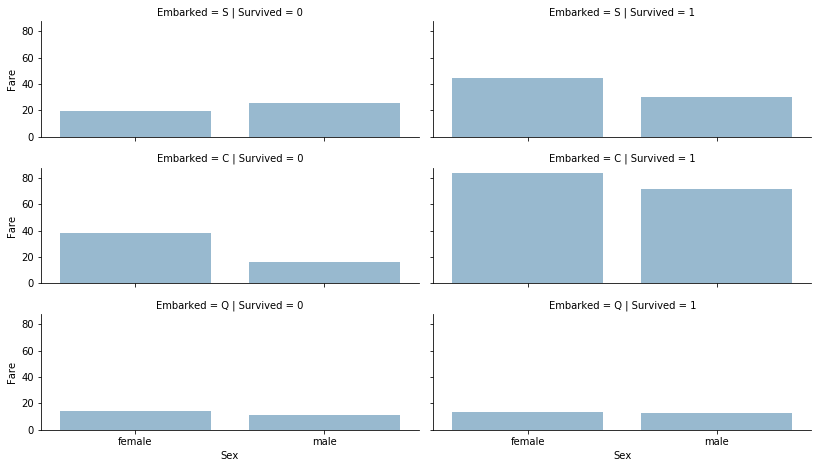

In [218]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=2.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 데이터 처리하기
지금까지 주어진 데이터에 대해 가정을 하며, 일부 필요한 특성에 대한 선택을 하였습니다. 하지만 지금까지는 데이터를 하나의 특성으로만 보아쏙, 특성에 대한 전처리나 수정 등을 하지는 않았습니다.
이제 수정과 생성 등을 통해 목표에 더 적합한 데이터를 만들어보도록 합니다.

### 특성 제거
특성제거는 좋은 방법중 하나입니다. 더 적은 데이터를 사용하면 속도와 분석 면에서 매우 큰 장점을 가집니다. 더 빠르고, 더 분석하기 쉬워집니다.
위에서 내린 몇가지 가정을 ㅌ오해 Cabin과 Ticket의 특성을 제거합니다. 훈련 데이터와 테스트 데이터에서 모두 제거해야 합니다.

In [219]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print(("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape))


Before (891, 12) (418, 11) (891, 12) (418, 11)
('After', (891, 10), (418, 9), (891, 10), (418, 9))


## 기존 특성에서 새로운 특성 만들기
Name 특성은 매우 까다로운 특성이지만, 일부 Advanced 커널에서는 다루는 요소입니다.

여기서는 Title이라는 특성을 만듭니다. 정규표현식을 이용하여 Name에서 . 앞에 까지를 자릅니다.  expand=False를 이용하여 DataFrame을 반환합니다.

### Observations
대부분의 Title은 Age 범위로 그룹을 정확하게 묶습니다.
Title에 따른 Age 범위의 생존율은 약간 다릅니다.
일부 Title은 대부분 생존했거나, 대부분 생존하지 않았습니다.

### Decision
Title 특성을 사용하도록 합시다.

In [220]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


이 타이틀 중 적은 수만 있는 타이틀은 Rare로 치환할 수 있습니다. 변수의 수를 줄여주고 더 좋은 결과를 만들 수 있습니다.

In [221]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


이 범주형 데이터를 서수형 데이터로 바꿀 수 있습니다.

In [222]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [223]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

범주형 특성 전환하기
이제 문자열로 이루어진 특성을 수치형으로 변환할 수 있습니다. 대부분의 알고리즘은 수치형을 입력으로 받기에 변환이 필요합니다.

우선 Sex 특성을 female=1, male=0으로 변환할 수 있습니다.

In [224]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 수치형 연속형 특성 채우기
이제 빈 부분의 데이터를 예측하고 채워넣어야 합니다. 우선 Age 특성을 먼저 살펴보겠습니다.

수치형 - 연속형특성을 채우는 3가지 방법을 보도록 하겠습니다.

1. 평균과 분산을 이용한 랜덤
2. 각 특성의 중앙값으로 사용 (Pclass, Gender)
3. 중앙값을 기준으로 평균과 분산 사용
1, 3방법은 랜덤 노이즈값이 모델에 안좋은 영향을 미칠 수 있으니, 여기서는 2번을 이용합니다,

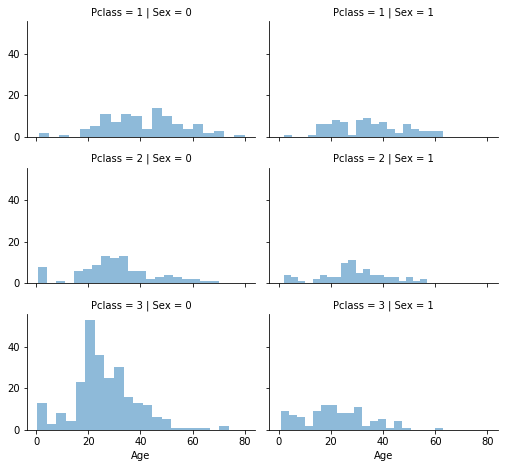

In [225]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


Pclass와 Sex 특성을 이용하여 Age를 예상하는 코드를 짜봅시다.

In [226]:
guess_ages = np.zeros([2,3])
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Sex(0, 1) 과 Pclass(1,2,3) 의 총 6가지 조합에 대해서 구해봅시다.

In [227]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) &  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median() # 중앙값 사용

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.tail()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,27,0,0,13.00,S,5
887,1,1,1,19,0,0,30.00,S,2
888,0,3,1,21,1,2,23.45,S,2
889,1,1,0,26,0,0,30.00,C,1
890,0,3,0,32,0,0,7.75,Q,1


In [228]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


이제 AgeBand 특성을 지우고 Age를 범주형으로 변환하겠습니다.

In [229]:
for dataset in combine :
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 1
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<= 32),'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<= 48),'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<= 64),'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [230]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 기존 특성을 합쳐 새로운  특성 만들기
FaminlySize 특성을 Parch와 SibSp를 이용하여 만들어보겠습니다.

In [231]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


여기서 혼자인 IsAlone이라는 새로운 특성을 만들 수 있습니다.

In [232]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


이제 IsAlone을 남기고 Parch, SibSp, FamilySize 를 이제 제거합니다. 30 : 70이면 꽤 유의미한 특성입니다

In [233]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1



그 외에도 Pclass와 Age 특성을 합친 가상 특성을 만들 수 있습니다


In [234]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age']*dataset['Pclass']

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,3,1,3
8,3,1,3
9,2,1,2


## 범주형 특성 채우기
Embarked 특성은 S, Q, C값을 가집니다. 하지만 훈련 데이터셋에 총 2개의 값이 Null값입니다. 최빈값으로 이를 채워봅시다.

In [235]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [236]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## 범주형 특성을 수치형으로 변환하기
이제 채워진 Embarked특성을 수치형으로 모두 바꿉시다.

In [237]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## 빠르게 수치형 특성 채우기 + 변환하기
이제 Fare 특성이 남았습니다. 1명이 비었습니다. 이 한명은 코드 한줄로 빠르게 채워봅시다.

이번에는 값을 채우기 위해 다른 상관관계를 굳이 추가 분석하지 않습니다. 이 채우기의 목표는 모델에 입력하기 위한 데이터 포맷의 완성이기 때문입니다.

In [238]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) # 변수를 직접 변환해준다는 의미
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [239]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [240]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,1,2,0,4,0,3
8,1,3,1,1,1,0,3,0,3
9,1,2,1,1,2,1,3,0,2


In [241]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,1,1,0,1,1,3
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 모델, 예측과 해결
이제 모델 훈련할 준비는 모두 끝났습니다. 예측 모델 알고리즘은 60개가 넘기 때문에 필요하고, 효율이 좋은 알고리즘을 이해하고 선택할 줄 알아야합니다. 이 문제는 분류 문제로 지도학습에 속하는 문제입니다. 지도학습에 사용되는 알고리즘은 다음과 같습니다.

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

## 훈련, 검증, 테스트 세트
    Beginner와 마찬가지로 Intermediate 에서도 train set로 score를 구하는 이유입니다.

보통은 train, test만 언급되지만, 더 확실하기 위해서는 train 데이터셋을 나누어 validation dataset을 만드는 것이 좋습니다. test data는 결과값을 모르기에 score을 낼 수가 없습니다. 그렇기에 훈련 데이터셋이 과적합되었는지 체크하기 위해서는 훈련 데이터셋에서 랜덤으로 추출한 검증 데이터셋을 만드는 것입니다.

그렇기에 캐글에서 고득점을 얻기 위해서는 cross validation과 validation set이 중요한 것입니다.

scikit-learn에서 train_test_split함수로 train을 나눌 수 있습니다. 하지만 이번에도 간단하게 따로 검증 셋을 만들지는 않겠습니다. 다음 커널에 시도해보도록 하겠습니다.

In [254]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression은 시작 단계에서 돌려보기 좋은 모델입니다. 이 모델은 종속 변수와 독립 변수 간의 관계를 구체적인 함수로 나타내어 예측 모델에 사용합니다. 이름과 다르게 분류 알고리즘입니다.

Reference Wikipedia.

훈련 데이터 세트에서 score를 확인합니다.

In [255]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log= round(logreg.score(X_train,Y_train) * 100 , 2)
acc_log

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.02

로지스틱의 회귀는 각 특성이 미치는 영향을 알아볼 수 있습니다. 결정 함수에서 사용되는 계수 값들을 알 수 있습니다.

양의 계수는 확률을 증가시키고, 음의 계수는 확률을 감소시킨다고 이해하면 됩니다

In [256]:
coeff_df  = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.152492
5,Title,0.463574
4,Embarked,0.256327
6,IsAlone,0.167668
3,Fare,-0.003358
2,Age,-0.197310
7,Age*Class,-0.237460
0,Pclass,-0.841680


다음은 Support Vector Machine, SVM이라고 불리는 지도학습 모델을 사용합니다. 분류와 회귀에 모두 사용되는 알고리즘입니다. 자세한 알고리즘 설명은 생략하겠습니다.


In [257]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.16

In [258]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.56

In [259]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

In [260]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.8

In [261]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\envs\py36_tf14\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.79

In [262]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.67

In [263]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.97

In [264]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.97

In [265]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.97
8,Decision Tree,85.97
0,Support Vector Machines,83.16
2,Logistic Regression,80.02
5,Perceptron,79.80
7,Linear SVC,78.79
1,KNN,78.56
6,Stochastic Gradient Decent,77.67
4,Naive Bayes,77.33
